# import packages

In [ ]:
from google.colab import files
import io

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt


from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB


# loading dataset

In [ ]:
uploaded = files.upload()
df = pd.read_csv(io.BytesIO(uploaded['breast-cancer-dataset.csv']))

Saving breast-cancer-dataset.csv to breast-cancer-dataset.csv


In [ ]:
df = pd.read_csv('/content/breast-cancer-dataset.csv')

In [ ]:
df.shape

(569, 33)

In [ ]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# data explore

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

Removing columns: id, unnamed 32 because they're of no use for classification

In [ ]:
df.drop(['Unnamed: 32', 'id'], axis=1, inplace=True)

Mapping malignant to 1 and benign to 0

In [ ]:
df['diagnosis'] = df['diagnosis'].map({'M':1, 'B':0})

In [ ]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

# Visualizations

Count plot

Text(0.5, 1.0, 'Countplot of diagnosis')

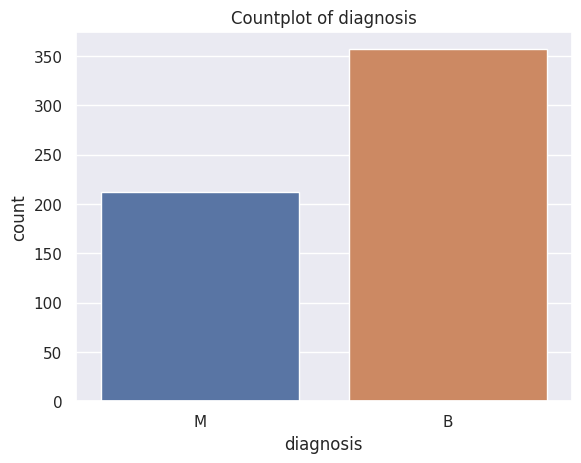

In [ ]:
sns.set(style="darkgrid")  # Optional: Set the style
sns.countplot(data=df, x='diagnosis')  # 'Category' is the column you want to plot
plt.title('Countplot of diagnosis')

# correlation check

In [ ]:
# features correlated to target variable: shares
correlation_with_target = df.corr(numeric_only=True)['diagnosis'].abs()
correlation_with_target = correlation_with_target.sort_values(ascending=False)[1:]

# print('All features:')
print(correlation_with_target)
print(len(correlation_with_target))

concave points_worst       0.793566
perimeter_worst            0.782914
concave points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se       0.077972
smoothness_se              0.067016
fractal_dimension_mean     0

In [ ]:
# Create a bar plot
def bar_plot_corr_analysis(x):
  plt.figure(figsize=(5, 5))
  sns.barplot(x=x, y=x.index, orient="h")
  plt.xlabel('Absolute Correlation with "diagnosis"')
  plt.title('Features Correlation with "diagnosis"')
  plt.show()
  return

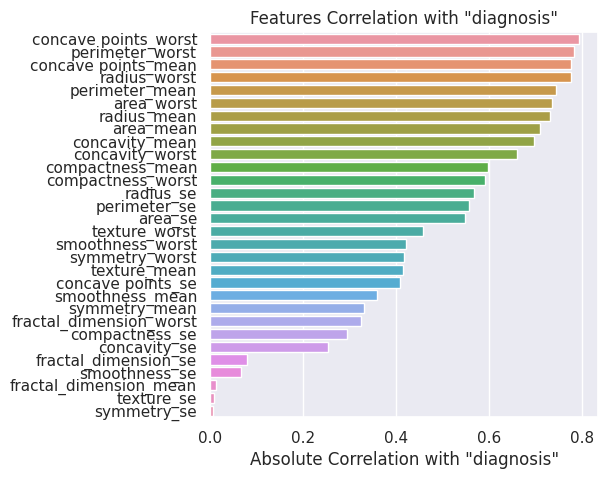

In [ ]:
bar_plot_corr_analysis(correlation_with_target)

In [ ]:
correlation_matrix = df.corr(numeric_only=True)

# Compute the correlation matrix
def corr_matrix(correlation_matrix):
  # print(correlation_matrix)

  plt.figure(figsize=(50,50))
  sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
  plt.title("Correlation Heatmap")
  plt.show()

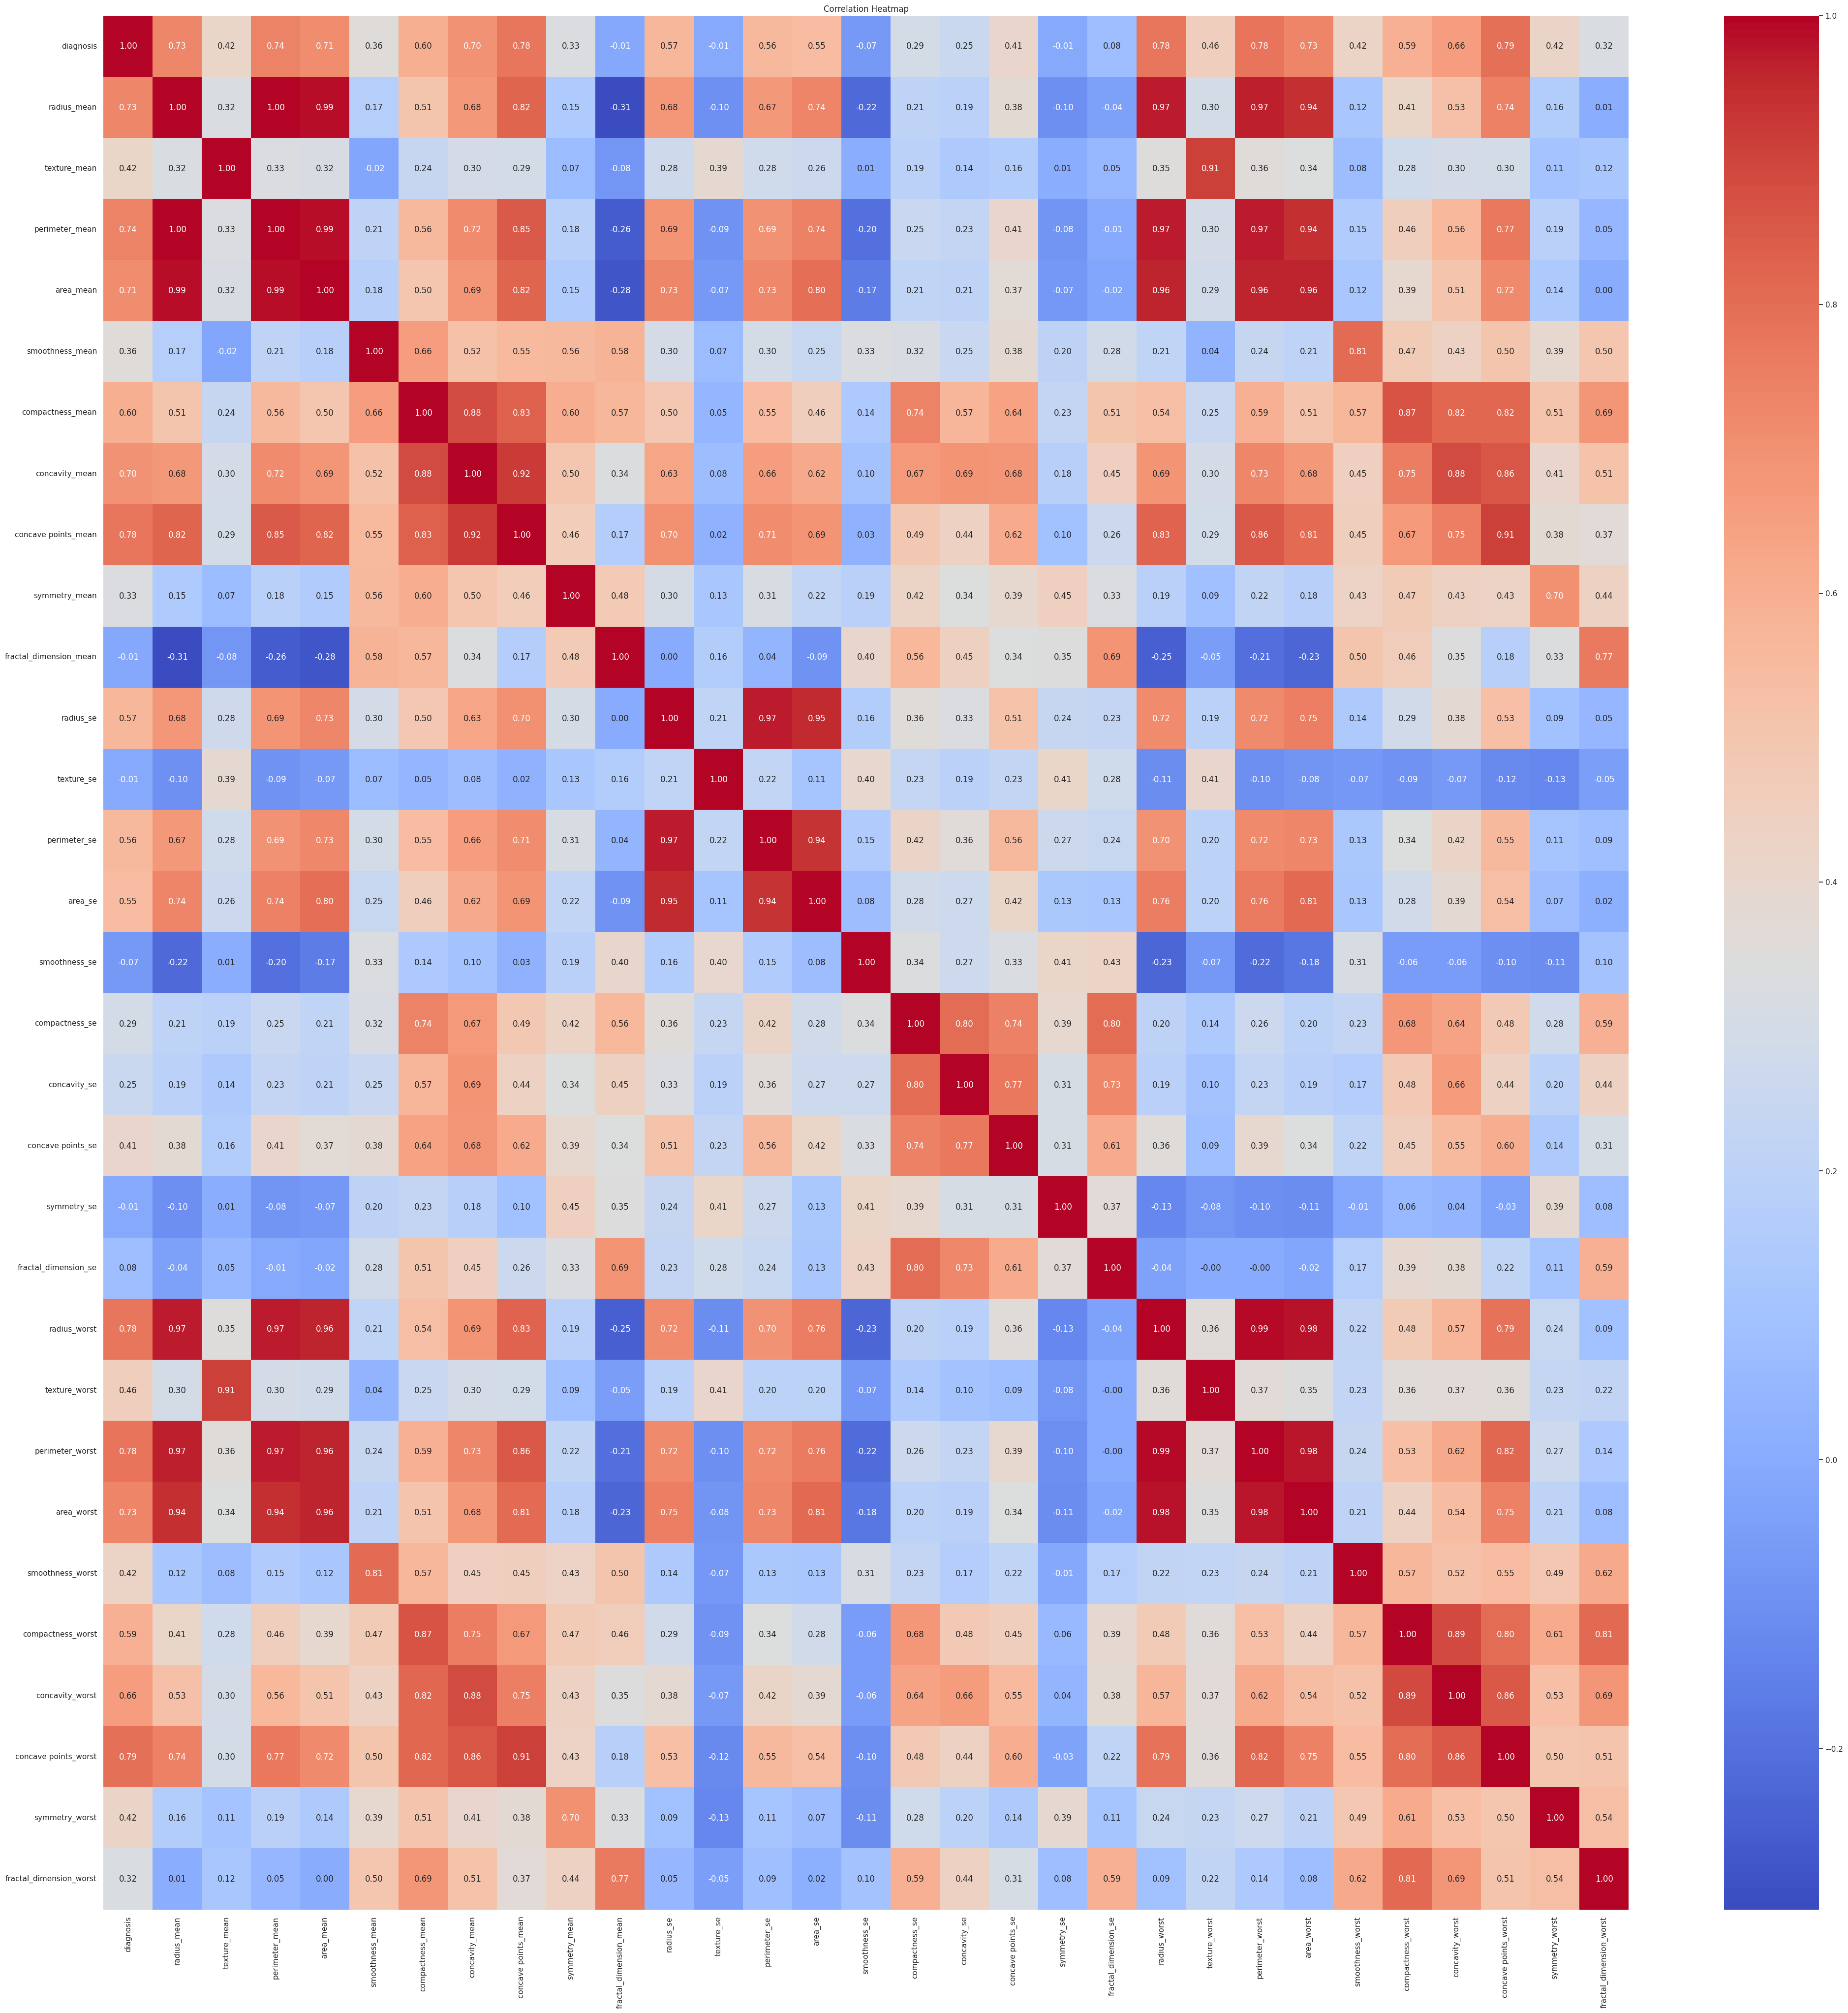

In [ ]:
corr_matrix(correlation_matrix)

In [ ]:
correlation_with_features = []

# defining a threshold
threshold = 0.87

for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            correlation_with_features.append((correlation_matrix.columns[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j]))

# Sorting the list of high correlations by the correlation coefficient (third element of the tuple)
correlation_with_features.sort(key=lambda x: abs(x[2]), reverse=True)


for col1, col2, corr in correlation_with_features:
    print(col1.ljust(30,' ') + 'and\t' + col2.ljust(30,' ') + f':{corr:.2f}')

radius_mean                   and	perimeter_mean                :1.00
radius_worst                  and	perimeter_worst               :0.99
radius_mean                   and	area_mean                     :0.99
perimeter_mean                and	area_mean                     :0.99
radius_worst                  and	area_worst                    :0.98
perimeter_worst               and	area_worst                    :0.98
radius_se                     and	perimeter_se                  :0.97
perimeter_mean                and	perimeter_worst               :0.97
radius_mean                   and	radius_worst                  :0.97
perimeter_mean                and	radius_worst                  :0.97
radius_mean                   and	perimeter_worst               :0.97
area_mean                     and	radius_worst                  :0.96
area_mean                     and	area_worst                    :0.96
area_mean                     and	perimeter_worst               :0.96
radius_se           

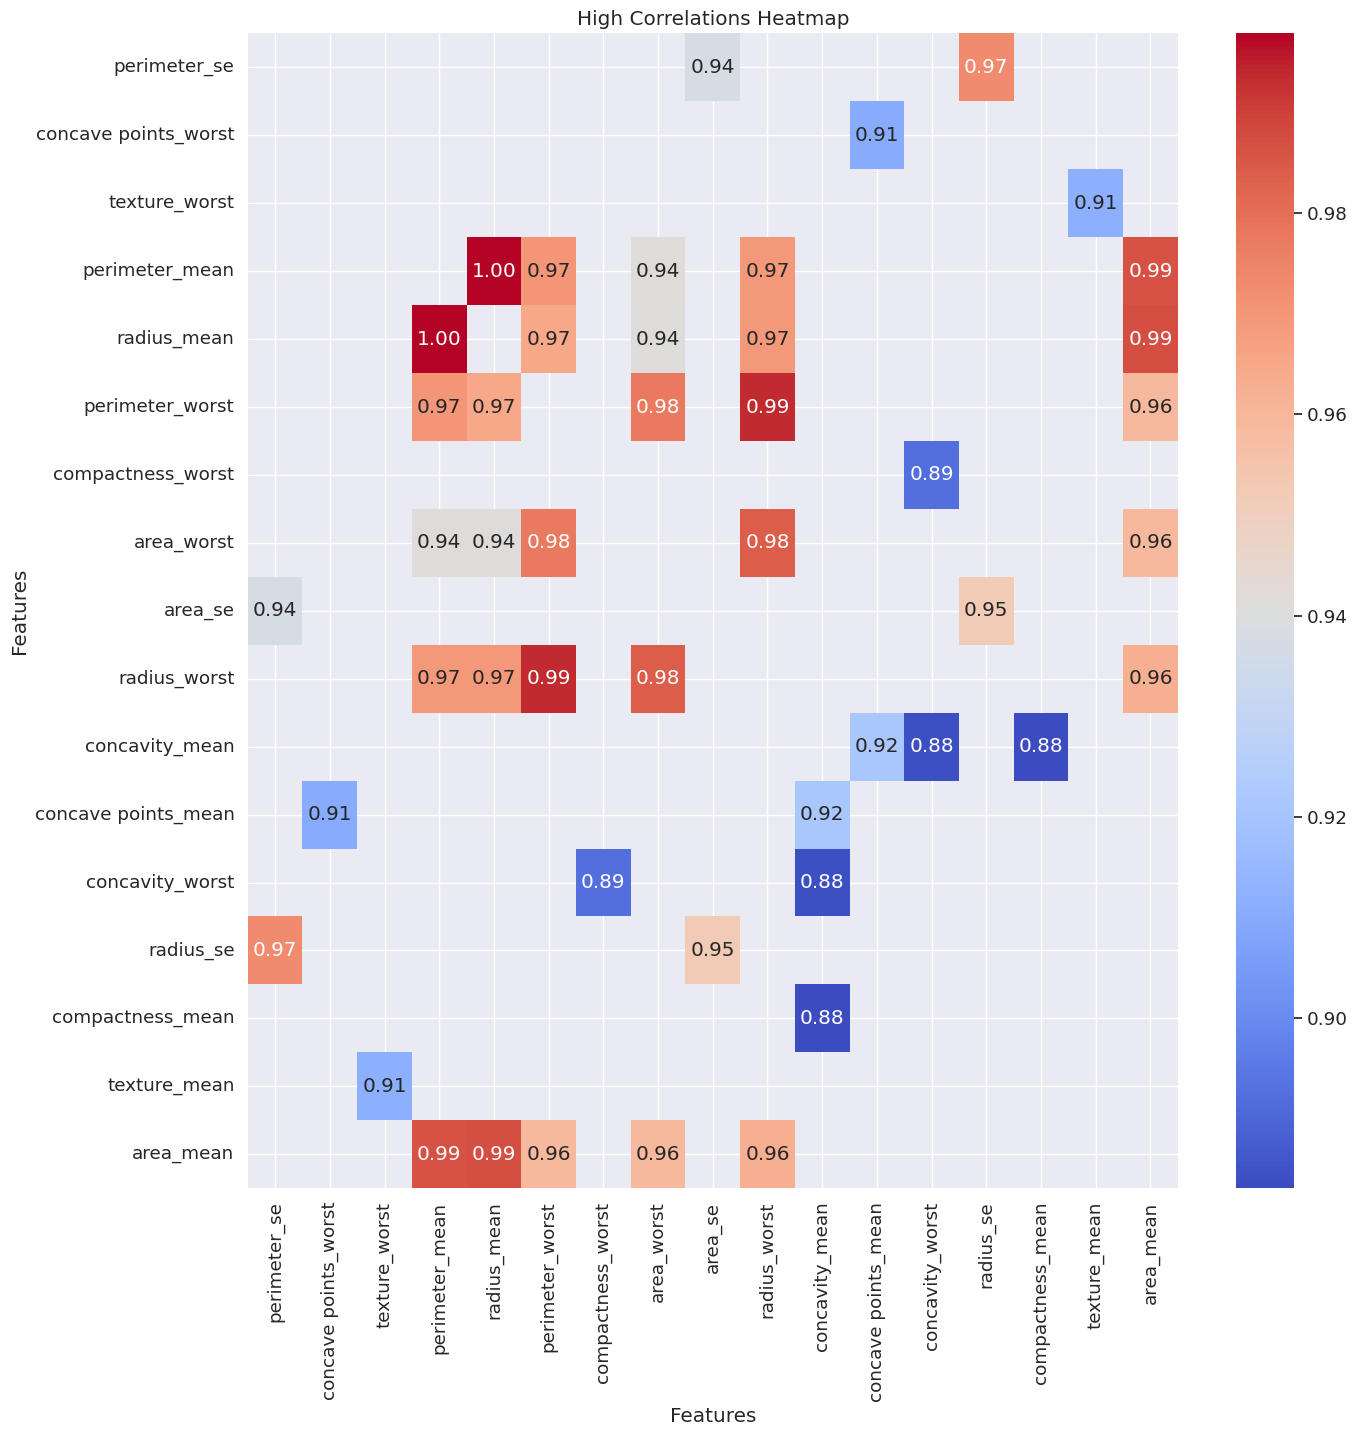

In [ ]:
# visualising high correlation pairs

# Extracting the unique list of features with high correlations
features_with_high_correlations = set()
for col1, col2, _ in correlation_with_features:
    features_with_high_correlations.add(col1)
    features_with_high_correlations.add(col2)

# Creating a DataFrame with the high correlations
high_corr_df = pd.DataFrame(columns=list(features_with_high_correlations), index=list(features_with_high_correlations))

# Populating the DataFrame with correlation values
for col1, col2, corr in correlation_with_features:
    high_corr_df.at[col1, col2] = corr
    high_corr_df.at[col2, col1] = corr

plt.figure(figsize=(15, 15))
sns.set(font_scale=1.2)
sns.heatmap(high_corr_df.astype(float), cmap='coolwarm', annot=True, fmt=".2f")
plt.xlabel('Features')
plt.ylabel('Features')
plt.title('High Correlations Heatmap')
plt.show()

In [ ]:
# deciding which features to remove among these highly correlated pairs
to_remove = []

# we will remove 1 feature having relatively less correlation with the target variable from each pair

for col1, col2, _ in correlation_with_features:
  if col1 not in to_remove and col2 not in to_remove:
    if correlation_with_target[col1]> correlation_with_target[col2]:
      to_remove += [col2]
    else:
      to_remove += [col1]


In [ ]:
to_remove

['radius_mean',
 'radius_worst',
 'area_mean',
 'area_worst',
 'perimeter_se',
 'perimeter_mean',
 'area_se',
 'concavity_mean',
 'texture_mean',
 'concave points_mean',
 'compactness_worst']

In [ ]:
correlation_with_target[to_remove]

radius_mean            0.730029
radius_worst           0.776454
area_mean              0.708984
area_worst             0.733825
perimeter_se           0.556141
perimeter_mean         0.742636
area_se                0.548236
concavity_mean         0.696360
texture_mean           0.415185
concave points_mean    0.776614
compactness_worst      0.590998
Name: diagnosis, dtype: float64

In [ ]:
# defining box plot func
def box_plot(feature):
    plt.figure(figsize=(5,3))
    sns.boxplot(data=df, x=feature)
    plt.title(f'Box Plot for {feature}', fontsize=14)
    plt.xlabel(f'{feature}', fontsize=12)
    plt.show()
    print()

In [ ]:
df.drop(to_remove, axis=1, inplace=True)

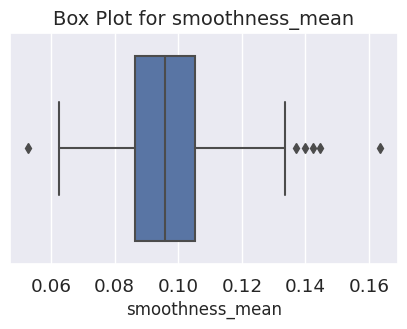

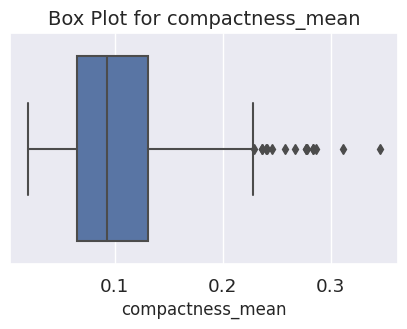

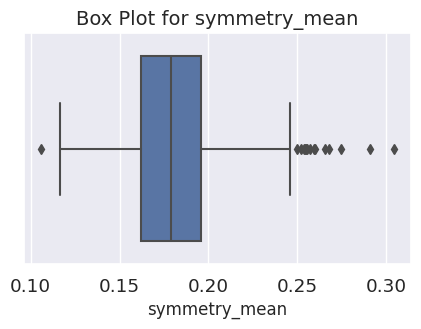

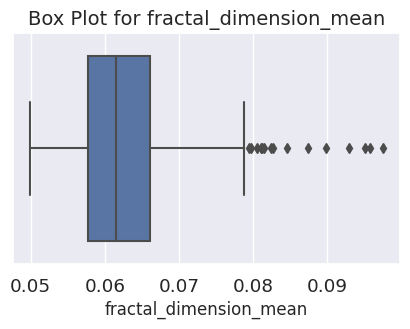

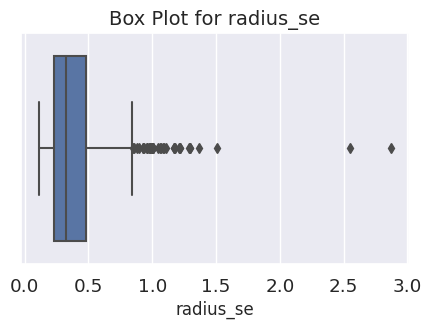

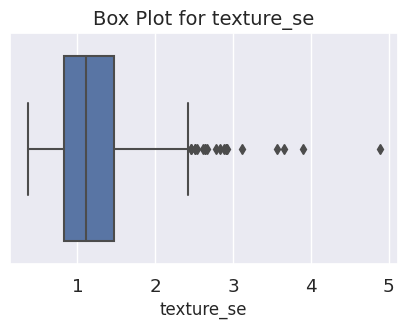

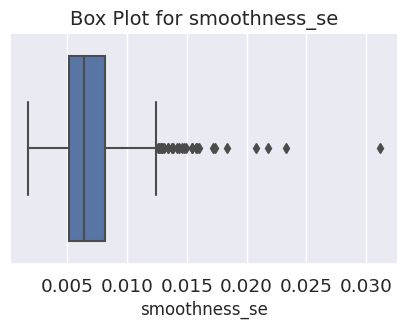

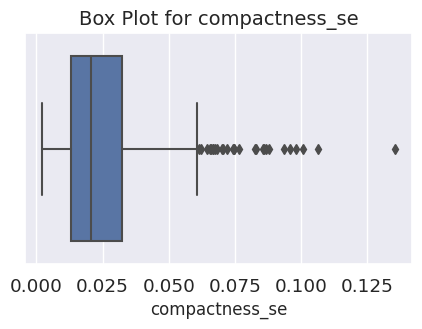

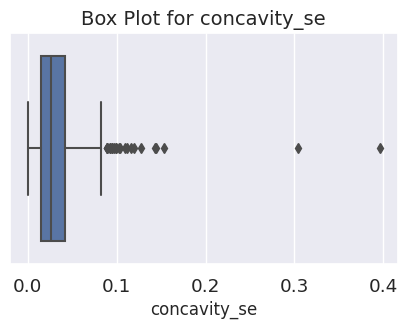

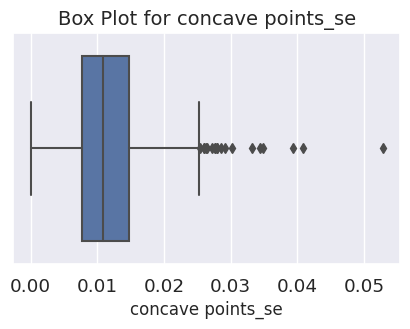

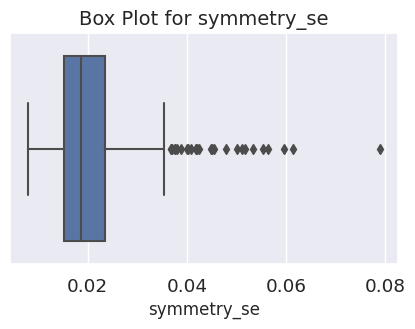

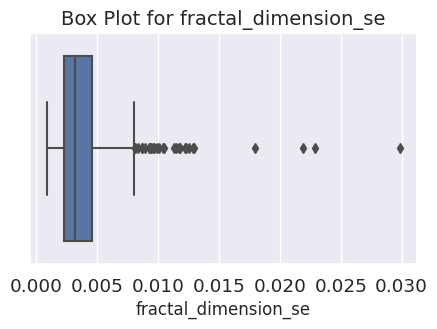

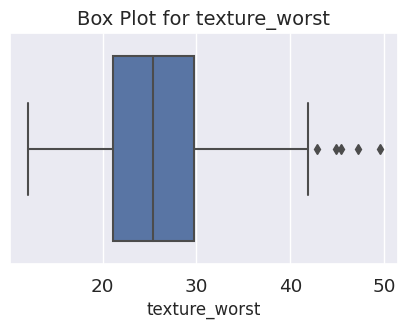

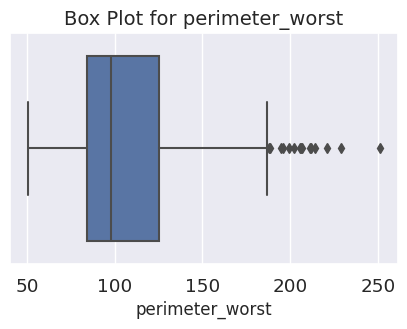

In [ ]:
for col in df.columns[1:15]:
  box_plot(col)

# Summary

In [ ]:
# uploaded = files.upload()
# df = pd.read_csv(io.BytesIO(uploaded['breast-cancer-dataset.csv']))

df = pd.read_csv('/content/breast-cancer-dataset.csv')

df.drop(['Unnamed: 32', 'id'], axis=1, inplace=True)
df['diagnosis'] = df['diagnosis'].map({'M':1, 'B':0})

# features correlated to target variable: shares
correlation_with_target = df.corr(numeric_only=True)['diagnosis'].abs()
correlation_with_target = correlation_with_target.sort_values(ascending=False)[1:]

correlation_matrix = df.corr(numeric_only=True)

correlation_with_features = []

# defining a threshold
threshold = 0.87

for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            correlation_with_features.append((correlation_matrix.columns[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j]))

# Sorting the list of high correlations by the correlation coefficient (third element of the tuple)
correlation_with_features.sort(key=lambda x: abs(x[2]), reverse=True)

# deciding which features to remove among these highly correlated pairs
to_remove = []

# we will remove 1 feature having relatively less correlation with the target variable from each pair

for col1, col2, _ in correlation_with_features:
  if col1 not in to_remove and col2 not in to_remove:
    if correlation_with_target[col1]> correlation_with_target[col2]:
      to_remove += [col2]
    else:
      to_remove += [col1]

df.drop(to_remove, axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   smoothness_mean          569 non-null    float64
 2   compactness_mean         569 non-null    float64
 3   symmetry_mean            569 non-null    float64
 4   fractal_dimension_mean   569 non-null    float64
 5   radius_se                569 non-null    float64
 6   texture_se               569 non-null    float64
 7   smoothness_se            569 non-null    float64
 8   compactness_se           569 non-null    float64
 9   concavity_se             569 non-null    float64
 10  concave points_se        569 non-null    float64
 11  symmetry_se              569 non-null    float64
 12  fractal_dimension_se     569 non-null    float64
 13  texture_worst            569 non-null    float64
 14  perimeter_worst          5

In [ ]:
uploaded = files.upload()
df = pd.read_csv(io.BytesIO(uploaded['breast-cancer-dataset.csv']))

# df = pd.read_csv('/content/breast-cancer-dataset.csv')

df.drop(['Unnamed: 32', 'id'], axis=1, inplace=True)
df['diagnosis'] = df['diagnosis'].map({'M':1, 'B':0})


# # standardization
# scaler = StandardScaler()

# df_processing_scaler = scaler.fit_transform(df.drop("diagnosis", axis=1))
# print(df_processing_scaler.shape)

# columns = list(df.columns)
# columns.remove("diagnosis")
# df_processing_scaler = pd.DataFrame(df_processing_scaler, columns=columns)
# df_processing_scaler.head()

Saving breast-cancer-dataset.csv to breast-cancer-dataset.csv


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

# Feature selection using RF classifier

In [ ]:
cols = df.columns
print(cols)

# all columns
cols1 = df[cols].drop(['diagnosis'], axis=1).columns

# selected using EDA
cols2 = ['texture_mean', 'area_mean', 'smoothness_mean',
       'concavity_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'texture_se', 'area_se', 'smoothness_se', 'concavity_se', 'symmetry_se',
       'fractal_dimension_se', 'smoothness_worst', 'concavity_worst',
       'symmetry_worst', 'fractal_dimension_worst']

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


In [ ]:
# Precision: The proportion of correctly classified instances.
# Sensitivity: The proportion of positive instances correctly classified.
# Specificity: The proportion of negative instances correctly classified.

def metrics_model (y_test, y_pred):
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)

    print("\nPrecision:", precision)
    print("Sensitivity:", recall)
    print("Specificity:", accuracy)

In [ ]:
def rf_accuracy(x):
  y=df['diagnosis']

  # split data train 70 % and test 30 %
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

  #random forest classifier with n_estimators=10 (default)
  rf = RandomForestClassifier(random_state=43)
  rf = rf.fit(x_train,y_train)

  pred = rf.predict(x_test)
  ac = accuracy_score(y_test, pred)
  print('Accuracy is: ',ac)
  cm = confusion_matrix(y_test, pred)
  sns.heatmap(cm,annot=True,fmt="d")

  metrics_model(y_test, pred)

testing accuracy using all columns:
Accuracy is:  0.9649122807017544

Precision: 0.9672131147540983
Sensitivity: 0.9365079365079365
Specificity: 0.9649122807017544


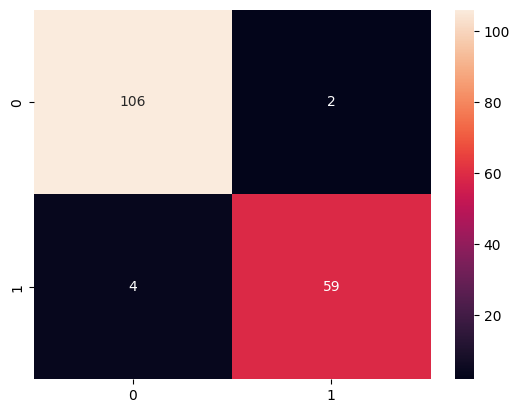

In [ ]:
print('testing accuracy using all columns:')
rf_accuracy(df[cols1])

testing accuracy using selected columns:
Accuracy is:  0.9649122807017544

Precision: 0.9672131147540983
Sensitivity: 0.9365079365079365
Specificity: 0.9649122807017544


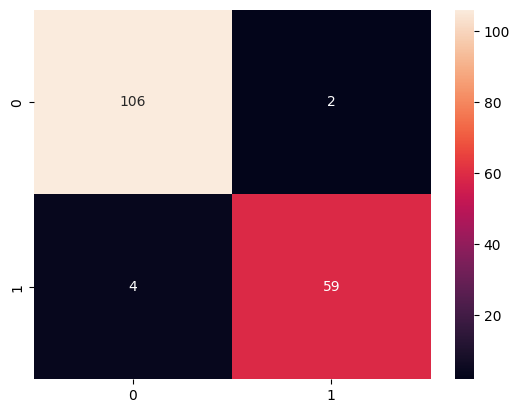

In [ ]:
print('testing accuracy using selected columns:')
rf_accuracy(df[cols2])

# univariate feature sel + RF

In [ ]:
x=df[cols2]
y=df['diagnosis']

# split data train 70 % and test 30 %
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
# find best scored 15 features
select_feature = SelectKBest(chi2, k=15).fit(x_train, y_train)
scores = {}

for i in range(len(select_feature.scores_)):
  scores[x_train.columns[i]] = float("{:.{}f}".format(select_feature.scores_[i], 1))

scores = dict(sorted(scores.items(), key=lambda item: item[1], reverse=True))
print(scores.keys())

dict_keys(['area_mean', 'area_se', 'texture_mean', 'concavity_worst', 'concavity_mean', 'symmetry_worst', 'concavity_se', 'smoothness_worst', 'symmetry_mean', 'smoothness_mean', 'fractal_dimension_worst', 'fractal_dimension_mean', 'texture_se', 'smoothness_se', 'symmetry_se', 'fractal_dimension_se'])


In [ ]:
cols3 = ['area_mean', 'area_se', 'texture_mean', 'concavity_worst',
         'concavity_mean', 'symmetry_worst', 'concavity_se', 'smoothness_worst',
         'symmetry_mean', 'smoothness_mean', 'fractal_dimension_worst',
         'fractal_dimension_mean', 'texture_se', 'smoothness_se', 'symmetry_se']

Accuracy is:  0.9707602339181286

Precision: 0.967741935483871
Sensitivity: 0.9523809523809523
Specificity: 0.9707602339181286


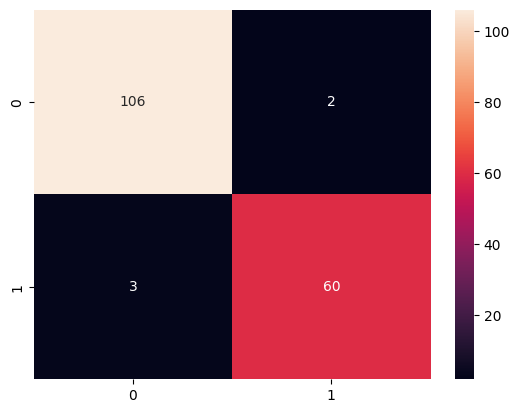

In [ ]:
rf_accuracy(df[cols3])

# Resampling using SMOTE

In [ ]:
x=df[cols3]
y=df['diagnosis']

In [ ]:
smote = SMOTE(random_state=42)
x, y = smote.fit_resample(x, y)

y.value_counts()

1    357
0    357
Name: diagnosis, dtype: int64

Text(0.5, 1.0, 'Countplot of diagnosis')

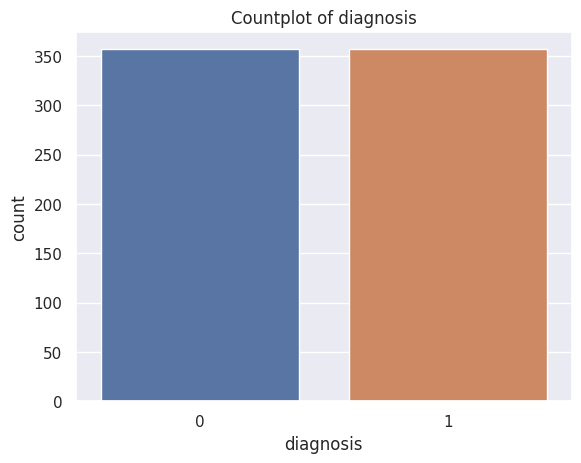

In [ ]:
sns.set(style="darkgrid")  # Optional: Set the style
sns.countplot(x=y)  # 'Category' is the column you want to plot
plt.title('Countplot of diagnosis')

# RF Model

Accuracy is:  0.9720930232558139

Precision: 0.9615384615384616
Sensitivity: 0.9803921568627451
Specificity: 0.9720930232558139


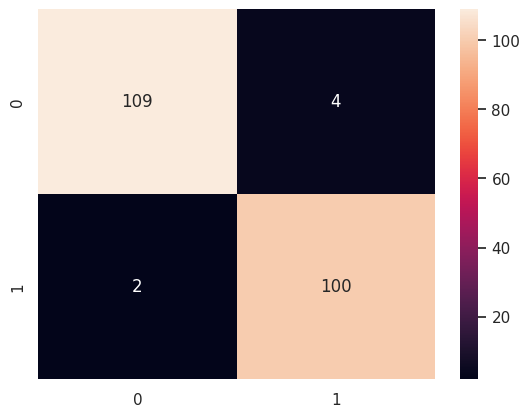

In [ ]:
# split data train 70 % and test 30 %
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Normalization
scaler = MinMaxScaler()

x_train[cols3] = scaler.fit_transform(x_train[cols3])
x_test[cols3] = scaler.transform(x_test[cols3])

#random forest classifier with n_estimators=10 (default)
rf = RandomForestClassifier(n_estimators=200, random_state=43)
rf = rf.fit(x_train,y_train)

pred = rf.predict(x_test)
ac = accuracy_score(y_test, pred)
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test, pred)
sns.heatmap(cm,annot=True,fmt="d")

metrics_model(y_test, pred)

In [ ]:
# Perform cross validation
precision = cross_val_score(rf, x, y, cv=10, scoring="precision")

# Print the cross validation result
print("Mean precision:", precision.mean())

Mean precision: 0.98046723193782


In [ ]:
# Generate a classification report
report = classification_report(y_test, pred)

# Print the report
print(report)

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       113
           1       0.96      0.98      0.97       102

    accuracy                           0.97       215
   macro avg       0.97      0.97      0.97       215
weighted avg       0.97      0.97      0.97       215



<ipython-input-204-7a699b715499>:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='FPR', y='TPR', data=roc_data, ci=None, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')


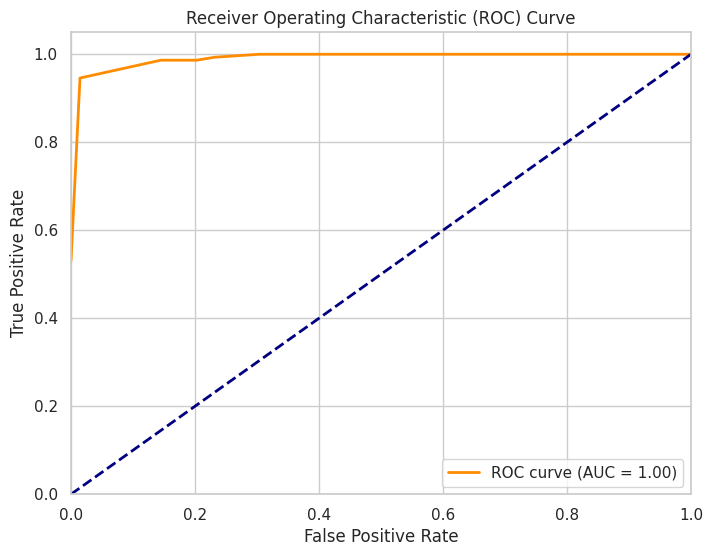

In [ ]:
# Calculate ROC curve
y_scores = rf.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Calculate the AUC (Area Under the Curve)
roc_auc = roc_auc_score(y_test, y_scores)

# Create a DataFrame for ROC curve data
roc_data = pd.DataFrame({'FPR': fpr, 'TPR': tpr})

# Plot ROC curve using Seaborn
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
sns.lineplot(x='FPR', y='TPR', data=roc_data, ci=None, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Logistic Regression

In [ ]:
# split data train 80 % and test 20 %
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Normalization
scaler = MinMaxScaler()

x_train[cols3] = scaler.fit_transform(x_train[cols3])
x_test[cols3] = scaler.transform(x_test[cols3])


lr_model = LogisticRegression(solver='liblinear')
lr_model.fit(x_train, y_train)

LogisticRegression(solver='liblinear')

Accuracy is:  0.9488372093023256

Precision: 0.9595959595959596
Sensitivity: 0.9313725490196079
Specificity: 0.9488372093023256


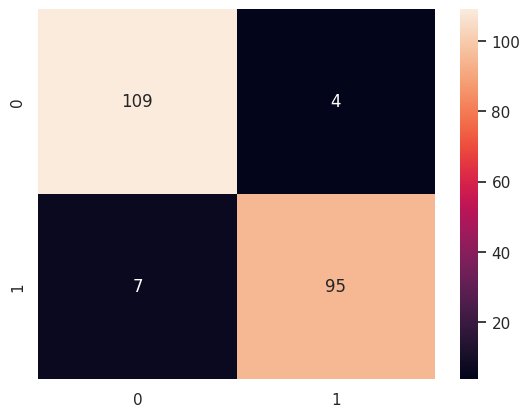

In [ ]:
pred = lr_model.predict(x_test)
ac = accuracy_score(y_test, pred)
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test, pred)
sns.heatmap(cm,annot=True,fmt="d")

metrics_model(y_test, pred)

<ipython-input-18-719abef2b3e2>:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='FPR', y='TPR', data=roc_data, ci=None, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')


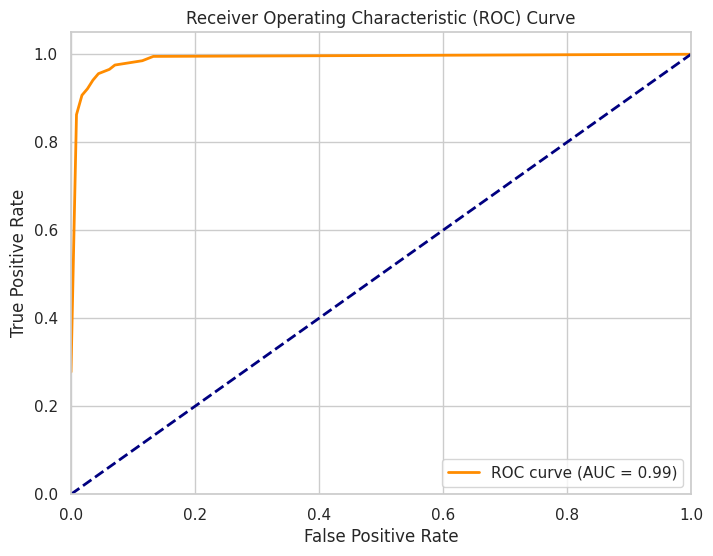

In [ ]:
# Calculate ROC curve
y_scores = lr_model.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Calculate the AUC (Area Under the Curve)
roc_auc = roc_auc_score(y_test, y_scores)

# Create a DataFrame for ROC curve data
roc_data = pd.DataFrame({'FPR': fpr, 'TPR': tpr})

# Plot ROC curve using Seaborn
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
sns.lineplot(x='FPR', y='TPR', data=roc_data, ci=None, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Perform cross validation
precision = cross_val_score(lr_model, x, y, cv=10, scoring="precision")

# Print the cross validation result
print("Mean precision:", precision.mean())

Mean precision: 0.9416777235409264


In [ ]:
# Generate a classification report
report = classification_report(y_test, pred)

# Print the report
print(report)

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       113
           1       0.96      0.93      0.95       102

    accuracy                           0.95       215
   macro avg       0.95      0.95      0.95       215
weighted avg       0.95      0.95      0.95       215



# KNN model

In [ ]:
# split data train 70 % and test 30 %
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Normalization
scaler = MinMaxScaler()

x_train[cols3] = scaler.fit_transform(x_train[cols3])
x_test[cols3] = scaler.transform(x_test[cols3])

# among 3,5,7 : best - 7
knn_model=KNeighborsClassifier(n_neighbors=7)
knn_model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=7)

Accuracy is:  0.9674418604651163

Precision: 0.9611650485436893
Sensitivity: 0.9705882352941176
Specificity: 0.9674418604651163


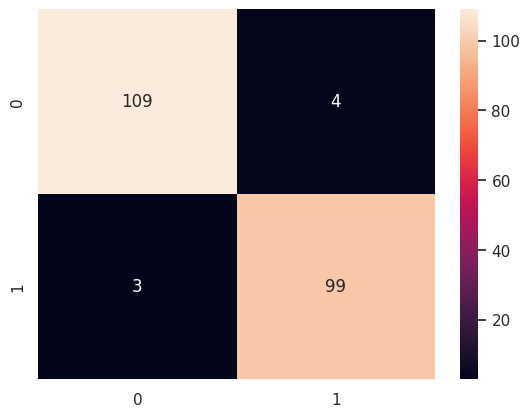

In [ ]:
pred = knn_model.predict(x_test)
ac = accuracy_score(y_test, pred)
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test, pred)
sns.heatmap(cm,annot=True,fmt="d")

metrics_model(y_test, pred)

In [ ]:
# Perform cross validation
recall = cross_val_score(knn_model, x, y, cv=10, scoring="recall")

# Print the cross validation result
print("Mean precision:", recall.mean())

Mean precision: 0.8880952380952382


<ipython-input-218-58c29d6d7812>:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='FPR', y='TPR', data=roc_data, ci=None, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')


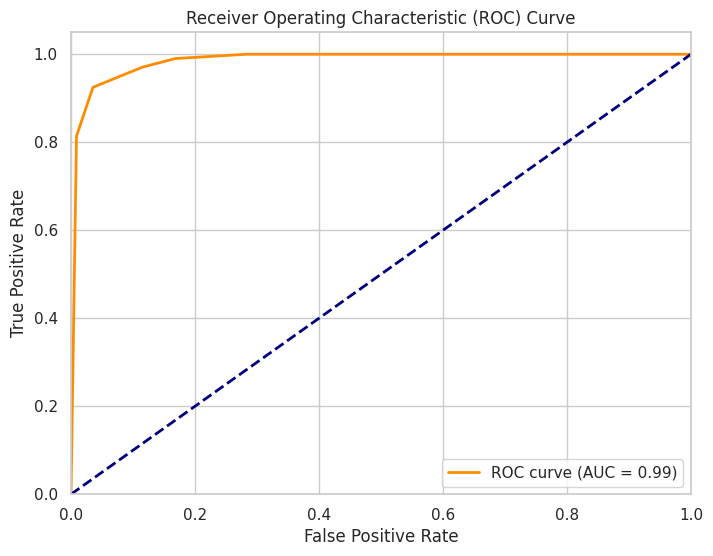

In [ ]:
# Calculate ROC curve
y_scores = knn_model.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Calculate the AUC (Area Under the Curve)
roc_auc = roc_auc_score(y_test, y_scores)

# Create a DataFrame for ROC curve data
roc_data = pd.DataFrame({'FPR': fpr, 'TPR': tpr})

# Plot ROC curve using Seaborn
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
sns.lineplot(x='FPR', y='TPR', data=roc_data, ci=None, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Generate a classification report
report = classification_report(y_test, pred)

# Print the report
print(report)

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       113
           1       0.96      0.97      0.97       102

    accuracy                           0.97       215
   macro avg       0.97      0.97      0.97       215
weighted avg       0.97      0.97      0.97       215



# Naive Bayes

In [ ]:
# split data train 70 % and test 30 %
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# # Normalization
# scaler = MinMaxScaler()

# x_train[cols3] = scaler.fit_transform(x_train[cols3])
# x_test[cols3] = scaler.transform(x_test[cols3])

In [ ]:
x_train.head()

,area_mean,area_se,texture_mean,concavity_worst,concavity_mean,symmetry_worst,concavity_se,smoothness_worst,symmetry_mean,smoothness_mean,fractal_dimension_worst,fractal_dimension_mean,texture_se,smoothness_se,symmetry_se
28,732.4,43.50,25.27,0.6335,0.16830,0.4027,0.03576,0.1641,0.1926,0.10820,0.09876,0.06540,1.0120,0.005233,0.01768
43,545.2,31.33,20.28,0.3664,0.09847,0.3739,0.02185,0.1530,0.1974,0.10410,0.10270,0.06782,0.8249,0.005072,0.01719
42,1104.0,104.90,24.81,0.7242,0.21070,0.4670,0.09723,0.1247,0.2310,0.09081,0.10380,0.06343,1.6660,0.006548,0.05333
73,584.1,23.35,15.79,0.2779,0.07789,0.2589,0.01759,0.1411,0.1662,0.10070,0.10300,0.06566,0.6205,0.004717,0.01220
167,886.3,67.34,18.80,0.2318,0.08422,0.2810,0.02626,0.1168,0.1893,0.08865,0.07228,0.05534,1.3910,0.006123,0.02091


In [ ]:
nb = GaussianNB()
nb.fit(x_train, y_train)

GaussianNB()

Accuracy is:  0.9395348837209302

Precision: 0.9494949494949495
Sensitivity: 0.9215686274509803
Specificity: 0.9395348837209302


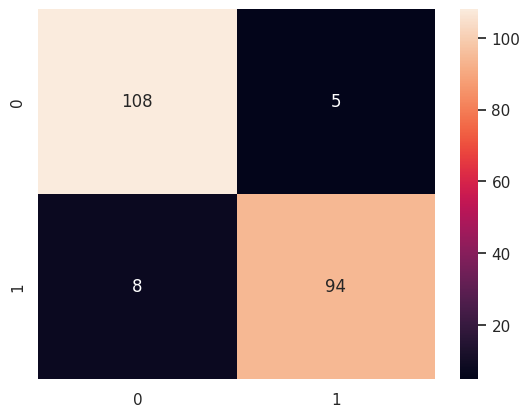

In [ ]:
pred = nb.predict(x_test)
ac = accuracy_score(y_test, pred)
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test, pred)
sns.heatmap(cm,annot=True,fmt="d")

metrics_model(y_test, pred)

In [ ]:
# Perform cross validation
recall = cross_val_score(nb, x, y, cv=10, scoring="recall")

# Print the cross validation result
print("Mean precision:", recall.mean())

Mean precision: 0.9046031746031746


<ipython-input-233-855e213a3836>:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='FPR', y='TPR', data=roc_data, ci=None, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')


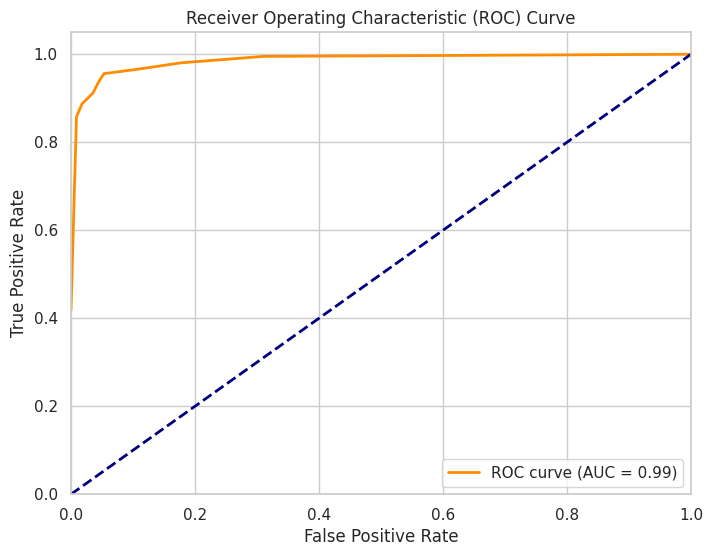

In [ ]:
# Calculate ROC curve
y_scores = nb.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Calculate the AUC (Area Under the Curve)
roc_auc = roc_auc_score(y_test, y_scores)

# Create a DataFrame for ROC curve data
roc_data = pd.DataFrame({'FPR': fpr, 'TPR': tpr})

# Plot ROC curve using Seaborn
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
sns.lineplot(x='FPR', y='TPR', data=roc_data, ci=None, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Generate a classification report
report = classification_report(y_test, pred)

# Print the report
print(report)

              precision    recall  f1-score   support

           0       0.93      0.96      0.94       113
           1       0.95      0.92      0.94       102

    accuracy                           0.94       215
   macro avg       0.94      0.94      0.94       215
weighted avg       0.94      0.94      0.94       215

